<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Hospital Problem</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Data information](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Drop column](#2.2)

2.3 [Check missing values](#2.3)

2.4 [Data type](#2.4)

2.5 [Upper Case the content](#2.5)

2.6 [Extra-whitespaces](#2.6)

2.7 [Descriptive statistics for Central Tendency](#2.7)

2.8 [Detect Outlier](#2.8)

2.9 [Save The Intermediate Data](#2.9)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

3.2 [Frequency of each corresponiding Target variable type](#3.2)

3.3 [Statistical Overview](#3.3)

3.4 [Correlation Matrix and Heatmap](#3.4)

<br>

### 4. [Feature Engineering](#4)

4.1 [Separating dependent and independent variables](#4.1)

4.2 [Encoding](#4.2)

> 4.2.1 [Binary Encoding for Name and Ticket Feature:](#4.2.1)

> 4.2.2 [Binary Encoding for Embarked Feature:](#4.2.2)

4.3 [Separating dependent and independent variables](#4.3)

4.4 [Splitting the training data](#4.4)

4.5 [Feature Scaling](#4.5)

<br>

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

5.1 [Feature Scaling](#5.2)

5.1 [Feature Scaling](#5.3)

5.1 [Feature Scaling](#5.4)


<br>

### 6. [Conculsions](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ✴️ 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.1
Pandas version:  1.2.4
Python 2.7.16


<a id="1.2"></a>
# 📲 1.2 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

> **Sample train Dataset**

In [3]:
## Importing the datasets
train = pd.read_csv("Data/train_data.csv", delimiter=',', skipinitialspace = True)

train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(train.shape))

# drop Unnamed, it is just a number given to identify each house
train.head(3)

The shape of the ORGINAL data is (row, column): (59966, 16)


,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1


> **Sample test Dataset**

In [4]:
test = pd.read_csv("Data/test_data.csv", delimiter=',', skipinitialspace = True)

test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(test.shape))

# drop Unnamed, it is just a number given to identify each house
test.head(3)

The shape of the ORGINAL data is (row, column): (69177, 15)


,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,1,New York City,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,2,New York City,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,3,New York City,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74


<a id="1.3"></a>
# 🔈 1.3 Data Information

> **Sample train Dataset**

In [5]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())

The shape of the train data is (row, column):(59966, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFaci

> **Sample test Dataset**

In [6]:
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the test data is (row, column):(69177, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69177 entries, 0 to 69176
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            69177 non-null  int64 
 1   HealthServiceArea             69177 non-null  object
 2   Gender                        69177 non-null  object
 3   Race                          69177 non-null  object
 4   TypeOfAdmission               69177 non-null  object
 5   CCSProcedureCode              69177 non-null  int64 
 6   APRSeverityOfIllnessCode      69177 non-null  int64 
 7   PaymentTypology               69177 non-null  object
 8   BirthWeight                   69177 non-null  int64 
 9   EmergencyDepartmentIndicator  69177 non-null  object
 10  AverageCostInCounty           69177 non-null  int64 
 11  AverageChargesInCounty        69177 non-null  int64 
 12  AverageCostInFacil

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
The dataset is splitted into two groups:
- Train set (train.csv)
- Test set (test.csv)

Now let's go through the features and describe a little:
***
**Categorical:** 
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **HealthServiceArea** (A description of the Health Service Area (HSA) in which the hospital is located)
   > - **TypeOfAdmission** 
   (A description of   the manner in which the patient was admitted to the health care facility)
            Newborn
            Emergency 
            Urgent
            Elective
   > - **Race** (Patient race)
            White
            Other Race 
            Black/African American
            Multi-racial
   > - **PaymentTypology** (A description of the type of payment for this occurrence.)
        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Gender**
            F
            M
   > - **EmergencyDepartmentIndicator** 
   (Emergency Department Indicator is set based on the submitted revenue codes. If the record contained an Emergency       Department revenue code of 045X)
            Y
            N
***
**Numeric:**
- **Discrete**
  >  - **ID**(Unique identifing # for each passenger)
  >  - **CCSProcedureCode** (AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code)
  >  - **APRSeverityOfIllnessCode** (All Patient  Refined Severity of Illness (APR SOI) Description) 
             Minor (1)
             Moderate (2)   
             Major (3)
             Extreme (4))
  >  - **LengthOfStay** (The total number  of patient days at an acute level and/or other than acute care level.)

- **Continous**
>  - **BirthWeight** (The neonate birth weight in grams; rounded to nearest)
>  - **AverageCostInCounty** (Average hospitalization Cost In County of the patient)
>  - **AverageChargesInCounty** (Average medical Charges In County of the patient)
>  - **AverageCostInFacility** (Average Cost In Facility)
>  - **AverageChargesInFacility** (Average Charges cost In Facility)
>  - **AverageIncomeInZipCode** (Average Income In Zip Code)
>  - **LengthOfStay** (The total number  of patient days at an acute level and/or other than acute care level.)

<a id="2.2"></a>
# ❌ 2.2 Drop column
***
In order to avoid data leakage, I desire to drop column `ID`.

In [ ]:
train = train.drop(columns=['ID'])
test = test.drop(columns=['ID'])

<a id="2.3"></a>
# 🔍 2.3 Check missing values:
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

> **Sample train Dataset**

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


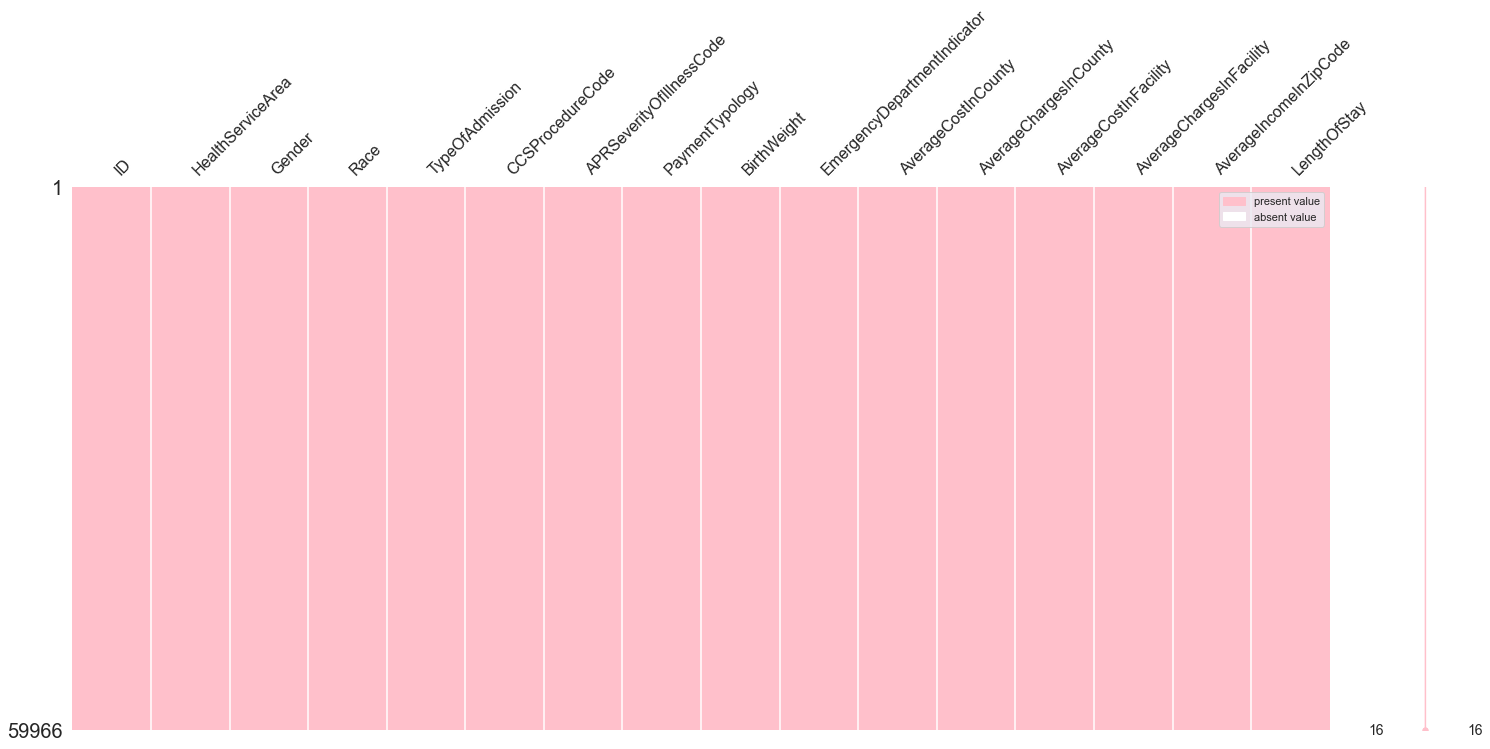

In [28]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(train).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(train, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

> **Sample test Dataset**

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


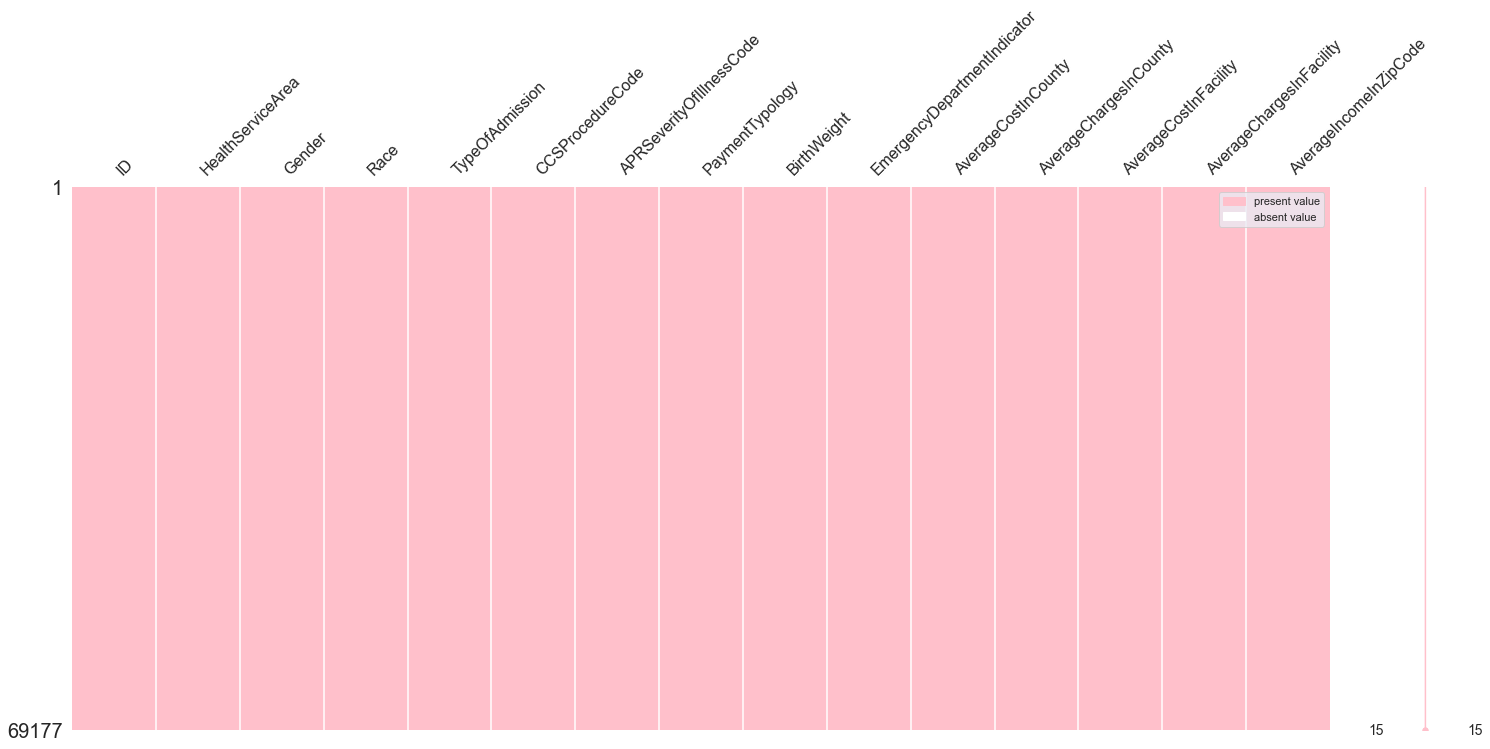

In [29]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(test).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION
*****
Suprisingly, there is no missing data in both of the dataset.

<a id="2.4"></a>
# 🦄 2.4 Data type
***

> **Sample train Dataset**

In [31]:
train['TypeOfAdmission'] = train['TypeOfAdmission'].astype('string')
train['Race'] = train['Race'].astype('string')
train['PaymentTypology'] = train['PaymentTypology'].astype('string')
train['Gender'] = train['Gender'].astype('string')
train['EmergencyDepartmentIndicator'] = train['EmergencyDepartmentIndicator'].astype('string')
train['CCSProcedureCode'] = train['CCSProcedureCode'].astype('int')
train['APRSeverityOfIllnessCode'] = train['APRSeverityOfIllnessCode'].astype('int')
train['LengthOfStay'] = train['LengthOfStay'].astype('int')
train['BirthWeight'] = train['BirthWeight'].astype('int')
train['AverageCostInCounty'] = train['AverageCostInCounty'].astype('int')
train['AverageChargesInCounty'] = train['AverageChargesInCounty'].astype('int')
train['AverageCostInFacility'] = train['AverageCostInFacility'].astype('int')
train['AverageChargesInFacility'] = train['AverageChargesInFacility'].astype('int')
train['AverageIncomeInZipCode'] = train['AverageIncomeInZipCode'].astype('int')

> **Sample test Dataset**

In [32]:
test['TypeOfAdmission'] = test['TypeOfAdmission'].astype('string')
test['Race'] = test['Race'].astype('string')
test['PaymentTypology'] = test['PaymentTypology'].astype('string')
test['Gender'] = test['Gender'].astype('string')
test['EmergencyDepartmentIndicator'] = test['EmergencyDepartmentIndicator'].astype('string')
test['CCSProcedureCode'] = test['CCSProcedureCode'].astype('int')
test['APRSeverityOfIllnessCode'] = test['APRSeverityOfIllnessCode'].astype('int')
test['BirthWeight'] = test['BirthWeight'].astype('int')
test['AverageCostInCounty'] = test['AverageCostInCounty'].astype('int')
test['AverageChargesInCounty'] = test['AverageChargesInCounty'].astype('int')
test['AverageCostInFacility'] = test['AverageCostInFacility'].astype('int')
test['AverageChargesInFacility'] = test['AverageChargesInFacility'].astype('int')
test['AverageIncomeInZipCode'] = test['AverageIncomeInZipCode'].astype('int')

<a id="2.5"></a>
# 💭 2.5 Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

> **Sample train Dataset**

In [33]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
train = train.applymap(lambda s: s.upper() if type(s) == str else s)
train.head(3)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,NEW YORK CITY,F,OTHER RACE,NEWBORN,228,1,MEDICAID,3700,N,2611,9227,1751,8951,45,3700
1,2,NEW YORK CITY,M,BLACK/AFRICAN AMERICAN,NEWBORN,228,1,MEDICAID,2900,N,3242,8966,3338,6409,34,2900
2,3,NEW YORK CITY,M,OTHER RACE,NEWBORN,220,1,PRIVATE HEALTH INSURANCE,3200,N,3155,11381,4980,9323,45,3200


> **Sample test Dataset**

In [34]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
test = test.applymap(lambda s: s.upper() if type(s) == str else s)
test.head(3)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,1,NEW YORK CITY,F,OTHER RACE,NEWBORN,216,3,MEDICAID,4900,N,3242,8966,2448,13196,34
1,2,NEW YORK CITY,F,WHITE,NEWBORN,220,1,MEDICAID,3100,N,2611,9227,1751,8951,45
2,3,NEW YORK CITY,M,MULTI-RACIAL,NEWBORN,115,1,MEDICAID,3300,N,3155,11381,1052,11314,74


<a id="2.6"></a>
# 📚 2.6 Extra-whitespaces:
***
There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.